# Analysis of the Winston Game


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d

# Calculating Cost and Production Across Levels

## Power
For the power, we have

$$\begin{align*}
L_p &:= \text{Power Level} \\
P &:= \text{Initial click power} \\
G_P &:= \text{Power per level} \\
C_P &:= \text{Initial Power cost} \\
R_P &:= \text{Power cost growth rate}
\end{align*}$$

The new clicker power, $P^*$ (in units of money per clicks) is given by
$$ P^* = P + G_P \cdot (L_P - 1). $$

The cost for each new power upgrade, $C_P^*$, at level $L_P$ is given by
$$C_P^* = C_P \cdot (R_P)^{L_P-1}$$

## Multipliers
For the multipliers, we have
$$\begin{align*}
L_M &:= \text{Multiplier Level} \\
M &:= \text{Initial power multiplier} \\
G_M &:= \text{Multiplier per level} \\
C_M &:= \text{Initial Multiplier cost} \\
R_M &:= \text{Multiplier cost growth rate}
\end{align*}$$

The new multiplier is given by
$$M^* = M + G_M\cdot (L_m - 1).$$

The cost for each new multiplier upgrade, $C_M^*$, at level $L_M$ is given by
$$C_M^* = C_M \cdot (R_M)^{L_M-1}.$$

## Total Production and Cost

The total production per click as a function of power and multiplier level is given by 
$$\Pi(L_P,L_M) = P^*\cdot M^* = (P+G_P\cdot (L_P - 1))(M+G_M\cdot (L_M - 1)).$$

The total cost as a function of power and multiplier level is given by 
$$ C(L_P,L_M) = C_P^* + C_M^* = (C_P\cdot (R_P)^{L_P-1})+(C_M \cdot (R_M)^{L_M-1}). $$

In [6]:
%%html
<h1>Graphing Production vs Cost Surfaces</h1>
<iframe src="https://www.geogebra.org/classic/s2nzfzj6?embed" width="1200" height="800" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>

In [3]:
power_level = 1 #@param {type:"number"}
power_initial = 1 #@param {type:"number"}
power_per_level = 1 #@param {type:"number"}
power_cost = 10 #@param {type:"number"}
power_cost_growth_rate = 1.15 #@param {type:"number"}


multiplier_level = 1 #@param {type:"number"}
multiplier_initial = 1 #@param {type:"number"}
multiplier_per_level = 0.3 #@param{type:"number"}
multiplier_cost = 10 #@param{type:"number"}
multiplier_cost_growth_rate = 1.15 #@param {type:"number"}



def multiplier_current(multiplier_level, multiplier_initial, multiplier_per_level):
  return multiplier_initial + multiplier_per_level * (multiplier_level - 1)


def multiplier_cost_fun(multiplier_level, multiplier_cost, multiplier_cost_growth_rate):
  return multiplier_cost * multiplier_cost_growth_rate ** (multiplier_level - 1)


def power_current(power_level, power_initial, power_per_level):
  return power_initial + power_per_level * (power_level - 1)


def power_cost_fun(power_level, power_cost, power_cost_growth_rate):
  return power_cost * power_cost_growth_rate ** (power_level - 1)


def production_fun(power_level, power_initial, power_per_level, multiplier_level, multiplier_initial, multiplier_per_level):
  return power_current(power_level, power_initial, power_per_level) * multiplier_current(multiplier_level, multiplier_initial, multiplier_per_level)


def cost_fun(power_level, power_cost, power_cost_growth_rate, multiplier_level, multiplier_cost, multiplier_cost_growth_rate):
  return power_cost_fun(power_level, power_cost, power_cost_growth_rate) + multiplier_cost_fun(multiplier_level, multiplier_cost, multiplier_cost_growth_rate)


Text(0.5, 0, 'Money')

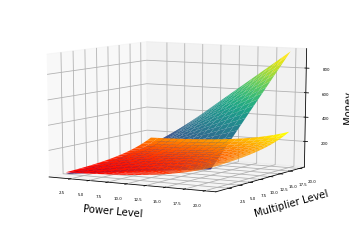

In [5]:
# Graphing surface plots.  Embedded GeoGebra is better.

# Making a progression of levels for power and multiplier
power_level = np.linspace(1, 20, 20)
multiplier_level = np.linspace(1, 20, 20)

# Creating a meshgrid out of the power and multiplier levels
X_pow_level, Y_mult_level = np.meshgrid(power_level, multiplier_level)

# Creating the Z axis points for production with the last number being the clicks per second
Z_production = production_fun(X_pow_level, power_initial, power_per_level, Y_mult_level, multiplier_initial, multiplier_per_level)
# Z_production2 = production_fun(X_pow_level, power_initial, power_per_level, Y_mult_level, multiplier_initial, multiplier_per_level) * 2
# Z_production3 = production_fun(X_pow_level, power_initial, power_per_level, Y_mult_level, multiplier_initial, multiplier_per_level) * 3
# Z_production4 = production_fun(X_pow_level, power_initial, power_per_level, Y_mult_level, multiplier_initial, multiplier_per_level) * 4
Z_production5 = production_fun(X_pow_level, power_initial, power_per_level, Y_mult_level, multiplier_initial, multiplier_per_level) * 7

# Z axis points for cost
Z_cost = cost_fun(X_pow_level, power_cost, power_cost_growth_rate, Y_mult_level, multiplier_cost, multiplier_cost_growth_rate)

fig = plt.figure()
ax = plt.axes(projection = "3d")
# ax.contour3D(X_pow_level, Y_mult_level, Z_production, 100, cmap="autumn")
# ax.contour3D(X_pow_level, Y_mult_level, Z_cost, 100, cmap="bone")

# Change Z_production number to see production surfaces for different values of clicks per second
surf_prod = ax.plot_surface(X_pow_level, Y_mult_level, Z_production5, rstride=1, cstride=1, cmap="viridis", edgecolor="none", label="Production")
surf_cost = ax.plot_surface(X_pow_level, Y_mult_level, Z_cost, rstride=1, cstride=1, cmap="autumn", edgecolor="none", label="Cost")


ax.tick_params(axis="both", which="major", labelsize=4)
ax.tick_params(axis="both", which="minor", labelsize=6)

ax.dist = 15

ax.view_init(10, -60)

ax.set_xlabel("Power Level")
ax.set_ylabel("Multiplier Level")
ax.set_zlabel("Money")

# Legend on plot
# surf_prod._edgecolors2d = surf_prod._edgecolor3d
# surf_prod._facecolors2d = surf_prod._facecolor3d

# surf_cost._edgecolors2d = surf_cost._edgecolor3d
# surf_cost._facecolors2d = surf_cost._facecolor3d

# ax.legend()